<a href="https://colab.research.google.com/github/JRose31/GNB-ML-Model/blob/main/Project1_Jamaine_Roseborough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GNB Machine Learning Model **Project 1**
Jamaine D Roseborough

## Defining Our Problem

Utilizing transaction data, we seek to predict whether or not a future customer will make a transaction based on their transaction data. 

## Collect / Load the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style used for all graphics outputs
plt.style.use('ggplot')
# Mount drive to access data
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


Next, we'll read in the csv file into our script.

In [2]:
# Load data from location in drive
trans_data = pd.read_csv('/drive/My Drive/Cohort_7/Projects/Project 1/Data/Train.csv')

## Data Examination & Cleaning

Getting a look at our dataset now, things we want to keep an eye out for:


*   Null Values
*   Shape and structure of dataset
*   Inconsistent Data Types
*   Meaning of recorded values
*   Meaning of our headers (if given)





Lets take a look at the first 5 rows of our dataset using the `.head()` method.

In [3]:
# Look at first 5 rows of dataset
trans_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,-5.1488,16.8911,11.1920,-5.2387,11.6418,5.1736,22.4321,-2.3440,6.5199,13.6468,13.8372,9.3225,11.0924,14.8421,-3.4132,14.1104,24.3627,2.0323,1.5093,0.8897,6.5674,15.6599,11.5659,-16.4727,4.0288,17.9244,10.4838,6.6760,12.6644,2.7004,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,-11.7684,19.3710,11.3702,-11.1147,1.2444,6.6885,7.9344,3.2709,5.5075,2.5462,18.1782,-13.5901,8.0905,11.7569,0.6939,13.9550,13.0858,6.6203,4.1569,8.2736,7.0513,16.1622,8.9231,11.7700,4.2578,-4.4223,-0.5687,-5.0121,15.1345,3.2003,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,-7.9940,19.0422,11.0449,-13.5174,4.1006,6.4059,9.8565,4.5048,6.3191,7.4729,15.7811,-4.4577,14.1613,14.2621,-0.0269,14.1963,20.3882,3.2304,2.9044,2.7768,6.6231,8.6674,11.4934,1.7624,4.0714,-1.2681,-5.1747,-1.0410,20.5092,3.2790,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,0.8135,6.1796,10.6093,-3.8294,8.0485,5.2091,23.6143,11.6875,4.0806,0.7839,10.5404,-2.3174,14.4027,7.2887,1.9480,14.3256,14.4135,4.2827,-2.5459,3.9618,7.1954,8.9821,10.4994,4.1622,3.7613,2.3701,17.0336,-11.0882,17.2502,2.5881,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,3.1736,19.3239,12.4057,-5.5963,6.9087,5.7555,1.6184,1.0273,7.1734,2.9598,13.3317,7.0799,9.3627,14.0553,0.6715,14.0837,28.2749,-0.1937,-3.6135,5.2964,6.6173,13.9547,11.5670,-12.7047,3.7574,9.9110,4.7022,6.5769,21.2607,3.2304,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


At first glance, this dataset looks neat. `ID_code` seems to function as an additional index to `Unnamed: 0`. We may be able to get rid of this.

We'll get an idea of the shape and composition of our dataset.

In [4]:
# Get more information regarding out dataset
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

It looks like we have a dataset with 51 columns, 180,000 rows, and are dealing with either floats or integers.

Now lets look at some summary statistics of our dataset.

In [5]:
# Get summary statistics on our dataset
trans_data.describe()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,17.264876,4.306171,-4.046449,14.777153,11.434945,-6.727860,8.942328,6.007784,11.946357,6.051401,5.347539,5.799587,14.721236,5.621549,12.735619,10.996891,-0.746871,14.224538,18.458395,5.515193,2.212756,1.190419,6.813431,7.765323,10.342814,-3.294620,3.990847,5.302094,6.980101,-2.870288,19.320843,2.963064,5.635896,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,8.203204,2.845792,5.921909,4.324646,0.541385,8.278554,5.905752,0.764765,7.364523,7.939415,1.993530,7.432116,2.300002,7.748588,4.185923,2.765963,1.862151,0.171058,4.354830,3.823662,2.621057,5.169343,0.375564,7.686960,2.520602,7.418545,0.198989,10.384752,4.964332,5.455353,5.019303,0.369891,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,-10.089000,-5.322500,-24.243100,1.508500,9.816900,-35.211700,-9.939600,3.344900,-19.544300,-21.633300,-1.818300,-18.042200,7.586500,-19.272200,-1.018500,2.819000,-7.280600,13.729000,5.769700,-9.239800,-6.858600,-15.194000,5.359300,-21.123200,0.427400,-29.984000,3.320500,-41.168300,-8.196600,-19.551500,3.816700,1.851200,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,11.552000,2.185350,-8.313225,11.456375,11.032400,-12.835875,5.303575,5.435000,6.756875,0.598475,3.815200,0.703000,13.216875,0.412475,9.664675,8.829700,-2.105300,14.098900,15.107300,2.817000,0.397300,-2.571400,6.544100,2.391950,8.646700,-8.757925,3.853700,-1.894525,3.340800,-7.092725,15.752275,2.698400,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,17.246850,4.275700,-4.184500,14.579150,11.435500,-6.615100,9.432200,6.027100,11.925300,6.298250,5.437750,6.071300,14.846150,6.014100,12.670700,10.981400,-0.772000,14.226800,18.276650,5.397400,2.248800,1.194600,6.806800,8.072150,10.395800,-3.170950,3.996000,5.288550,7.006550,-2.632150,19.272750,2.959900,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,23.100050,6.290225,-0.090100,18.107200,11.845000,-0.885250,13.083800,6.542325,17.039600,11.817825,6.864700,11.444800,16.343000,11.159500,15.837300,13.086500,0.526925,14.361800,21.857650,8.109525,4.119400,5.090450,7.070900,13.236650,12.116300,2.043350,4.131625,12.701300,10.776700,1.321300,23.021875,3.241425,

With `target` having such a small standard deviation as well as a min and max of 0 and 1, this is likely our output variable. Also, besides `Unnamed: 0` which we know is our index, none of our columns seem to have any othr signs of annomalies to keep in mind.


`.info()` showed 180,000 non-null values for every column. We'll double check.

In [6]:
# Check for null values
trans_data.isnull().sum()

Unnamed: 0    0
ID_code       0
target        0
var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19        0
var_20        0
var_21        0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
var_43        0
var_44        0
var_45        0
var_46        0
var_47        0
var_48        0
var_49        0
dtype: int64

We do not have any null values in our dataset (this is rare). We can now move on to our Exploratory Data Analysis!

## EDA *(Exploratory Data Analysis)*

First, we need to explore out data a bit more in order to determine what model we want to fit our data into. In this case, we'll attempt to use the Gaussian Naive Bayes model, so we first need to make sure that our data follows the assumptions made by Gaussian Naive Bayes about our dataset.


**Assumptions**

1.   Our Predictors are continuous
2.   Our Predictors are normally distributed



We know that our predictors are continuous because the only binary data type we have is the `target` column, which serves as our output. The rest (`var_0` - `var_49`) are our continuous predictors.

Now we need to make sure that our dataset follows the second assumption that our predictors are normally distributed.

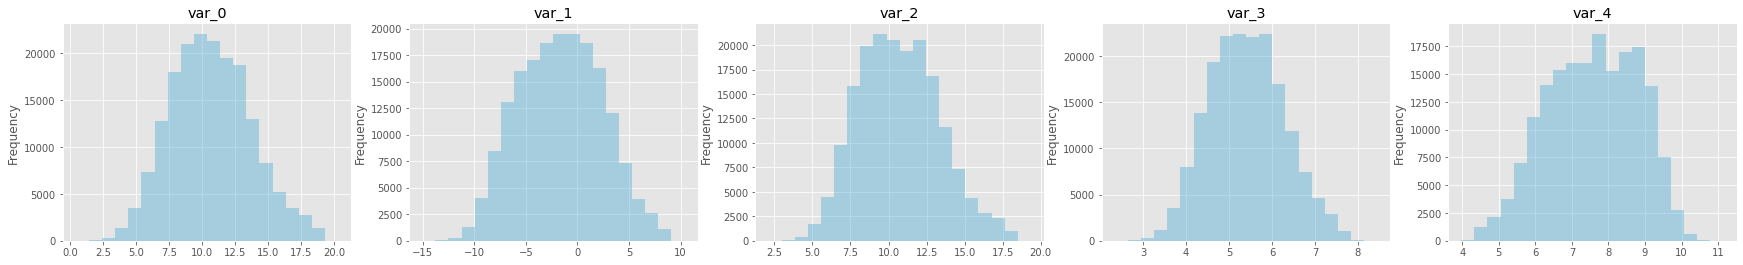

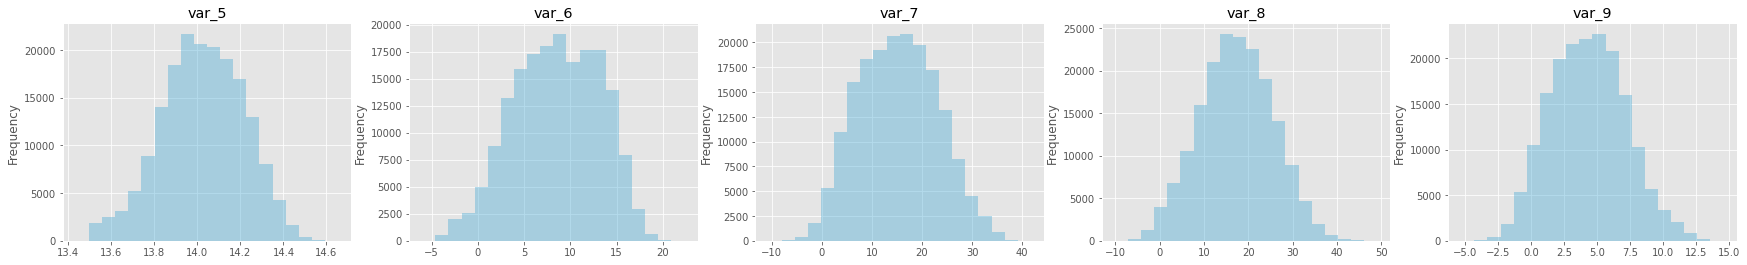

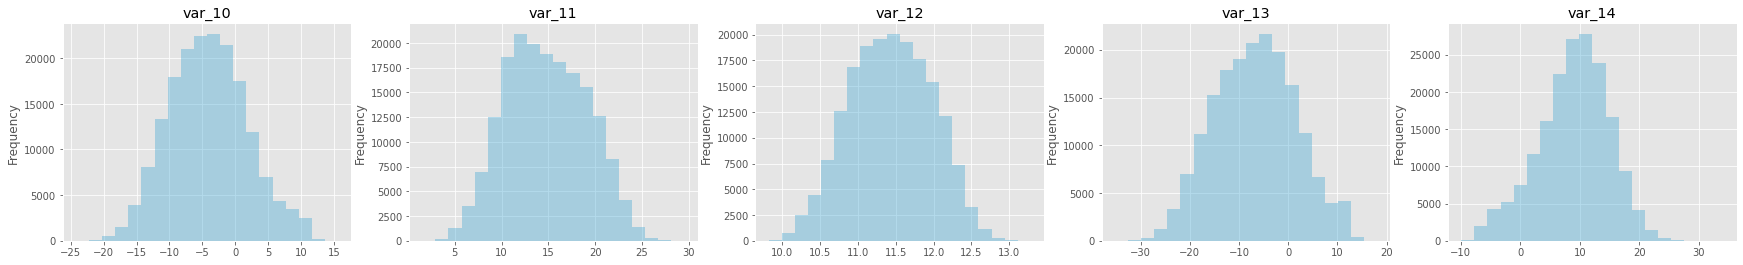

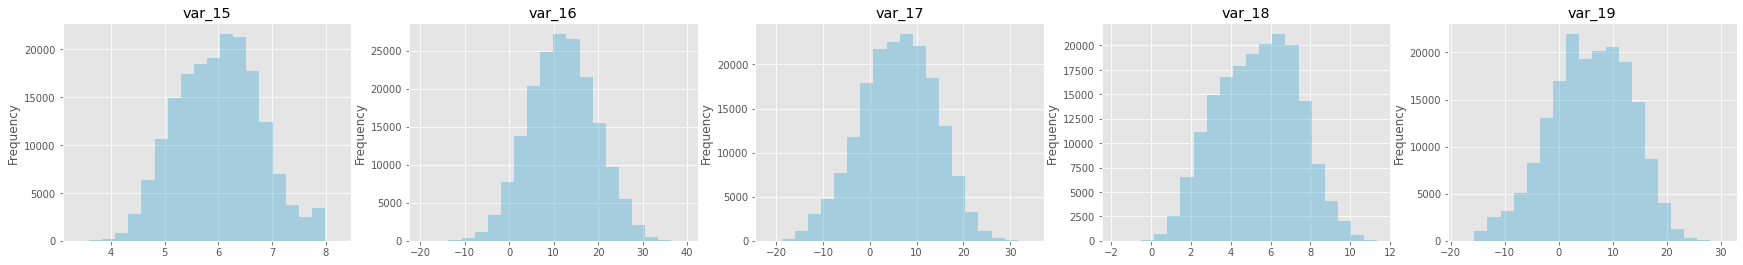

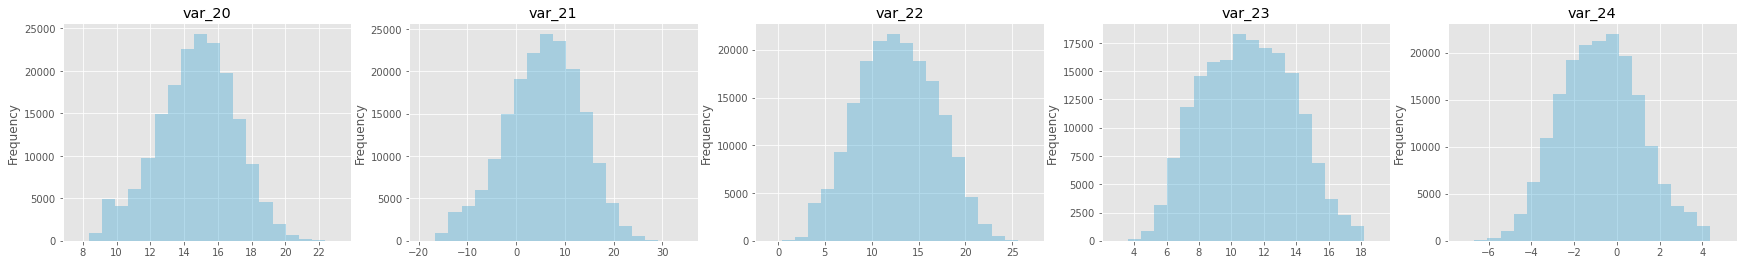

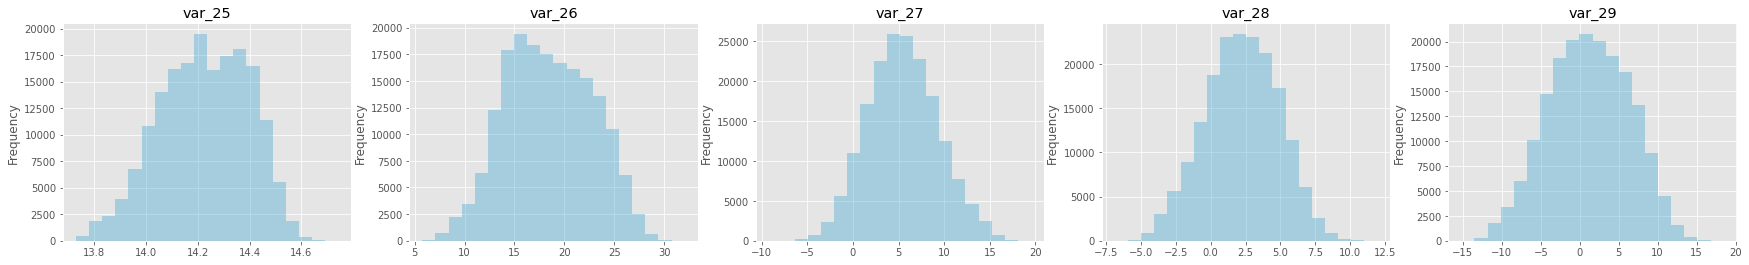

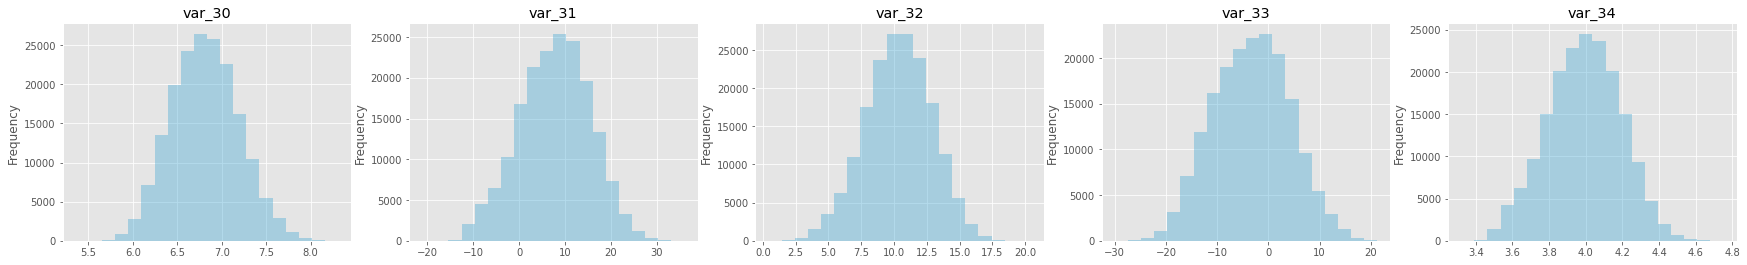

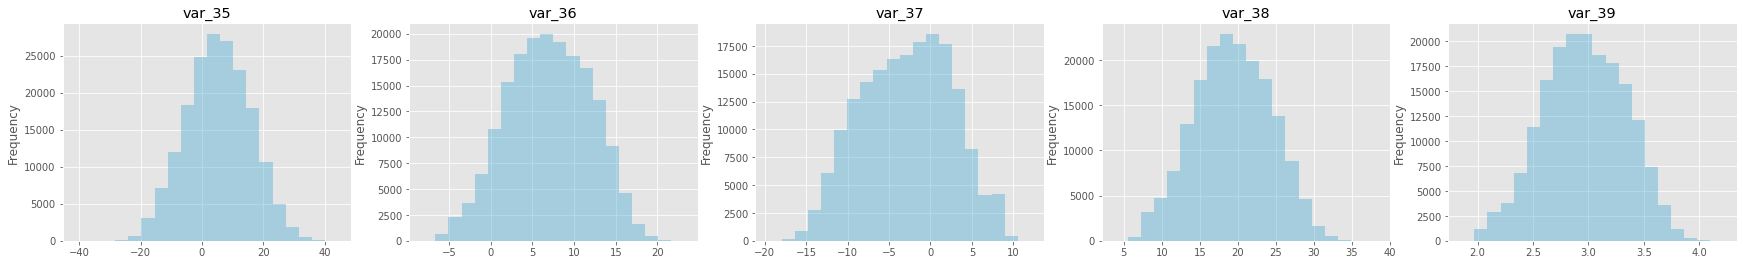

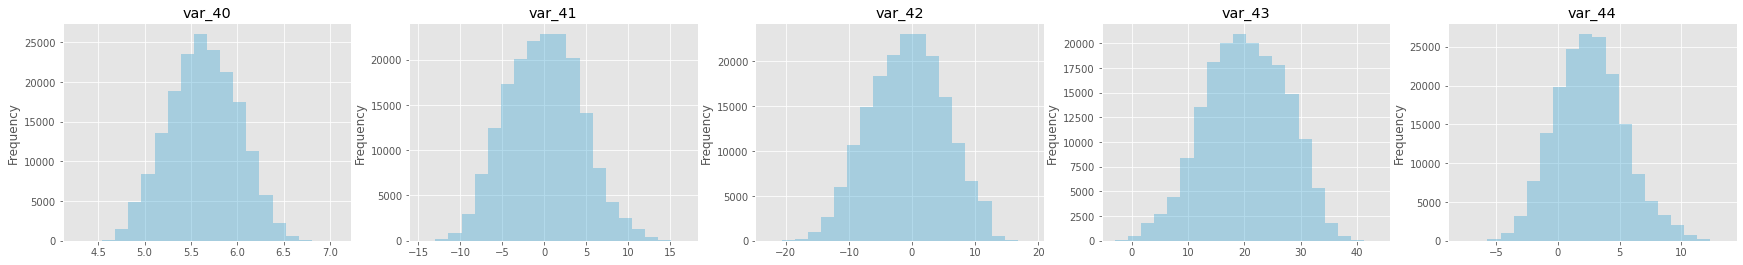

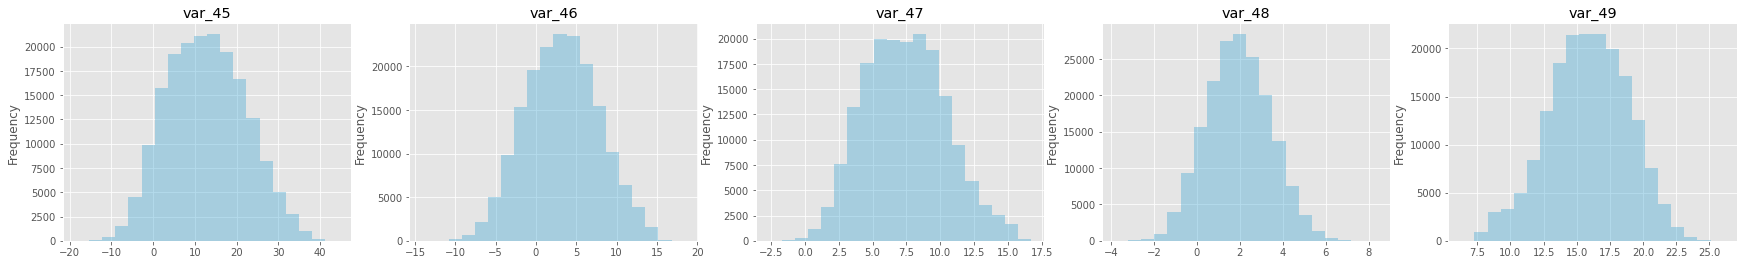

In [7]:
df = pd.DataFrame(trans_data)

# Create list of header names
cols = ['var_'+str(i) for i in range(50)]

# Split list into chunks to graph 5 plots per row
col_chunks = [cols[i:i + 5] for i in range(0, len(cols), 5)] 

for i in range(10):
  # Set 5 subplots
  fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(30, 4))

  # Plot each header on its own subplot in chunks of 5
  df[col_chunks[i][0]].plot(kind = 'hist', ax = ax1, alpha = 0.4, bins = 20, color = '#48aad4').set_title(col_chunks[i][0])
  df[col_chunks[i][1]].plot(kind = 'hist', ax = ax2, alpha = 0.4, bins = 20, color = '#48aad4').set_title(col_chunks[i][1])
  df[col_chunks[i][2]].plot(kind = 'hist', ax = ax3, alpha = 0.4, bins = 20, color = '#48aad4').set_title(col_chunks[i][2])
  df[col_chunks[i][3]].plot(kind = 'hist', ax = ax4, alpha = 0.4, bins = 20, color = '#48aad4').set_title(col_chunks[i][3])
  df[col_chunks[i][4]].plot(kind = 'hist', ax = ax5, alpha = 0.4, bins = 20, color = '#48aad4').set_title(col_chunks[i][4])



All of our predictors seem to follow normal distributions.


One more assumption Gaussian Naive Bayes makes is that our predictors aren't coorelated. We'll want to create a heat map and use the `.corr` method on our dataframe to see if there are any heavily coorelated predictors. The may want to drop these.

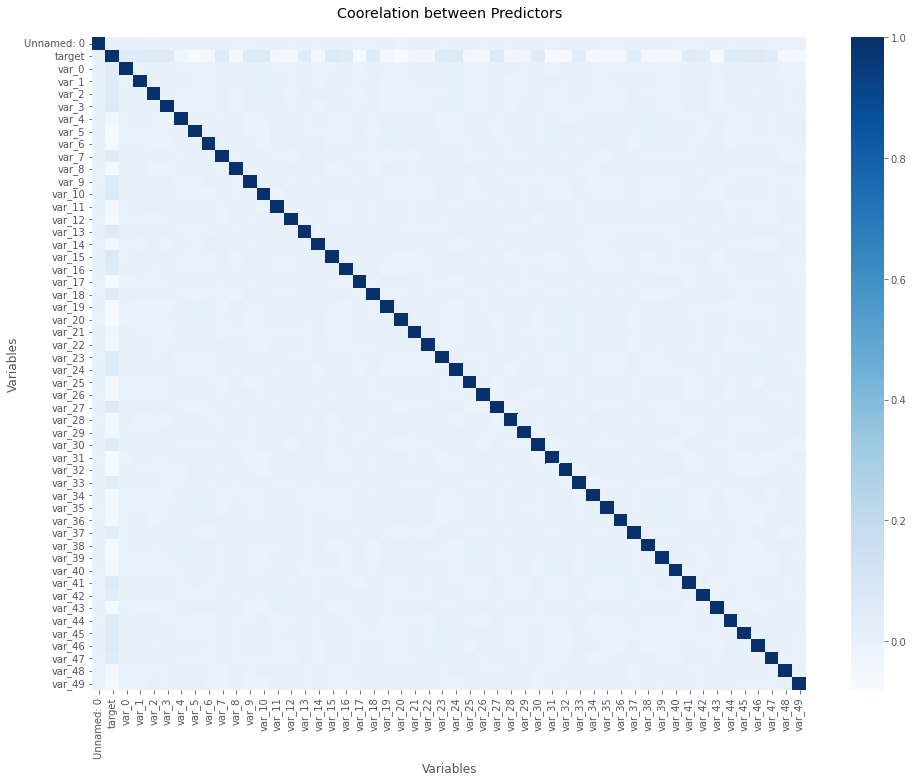

In [8]:
# Create copy to clean, shape, and fit our dataframe
trans_data_copy = pd.DataFrame(trans_data.copy())

# Drop the 'ID_code' column because it serves as a second index to 'Unnamed: 0' column
trans_data_copy.drop(columns = ['ID_code'], inplace = True)

# Map out correlations between predictors
cols_corr = trans_data_copy.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(cols_corr, cmap="Blues")
plt.title('Coorelation between Predictors', pad= 20)
plt.xlabel('Variables')
plt.ylabel('Variables');

There doesnt seem to be any noteworthy correlations between our dataset.

One last analysis we need to make on our dataset is looking at our target variable and verifying that the values really are binary.

In [9]:
set(trans_data['target'])

{0, 1}

First, we'll divide our dataset into two seperate dataframes. One will house our data with successful transactions, and the other housing the data with unsuccessful transactions. This will first give us an idea of how balanced out dataset is. Depending on our findings, we may have to restructure our dataset.

In [10]:
# Create dataframe of only successful transactions (denoted by a value of 1 in target column)
good_trans = pd.DataFrame(trans_data_copy[trans_data_copy['target'] == 1])

# Check our target column to ensure we only have successful transactions
print(set(good_trans['target']))

# Get size of our good transational data
print(f"Size: {good_trans.shape}")


{1}
Size: (18040, 52)


In [11]:
# Create dataframe of only unsuccessful transactions (denoted by a value of 0 in target column)
bad_trans = pd.DataFrame(trans_data_copy[trans_data_copy['target'] == 0])

# Check our target column to ensure we only have successful transactions
print(set(bad_trans['target']))

# Get size of our good transational data
print(f"Size: {bad_trans.shape}")

{0}
Size: (161960, 52)


Heres the balance of our dataset:

|     | 0 | 1     |
| :---        |    :----:   |          ---: |
| Count     | 161,960   | 18,040 |

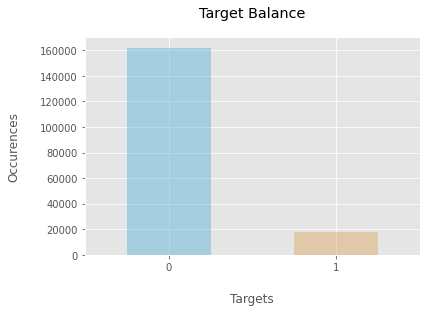

In [12]:
# Visualize dataset balance using 'Target' column from copy dataset
trans_data_copy['target'].value_counts().sort_index().plot(kind='bar', rot=0, color = ['#48aad4', '#d69f4d'], alpha = 0.4)
plt.xlabel('Targets', labelpad= 20)
plt.ylabel('Occurences', labelpad= 20)
plt.title('Target Balance', pad= 20);

Our data is heavily skewed towards our unsuccessful transactions. This we'll need to remember when assessing the performance of our model.

Quickly, we'll run a operation to see if all of our data made it into one of the two dataframes we created. The sum of our rows shoul be equal to 180,000 (amount of rows in our entire dataset)

In [13]:
# .shape reutrns the rows and columns in a tuple, first item being the qty of rows
good_trans.shape[0] + bad_trans.shape[0]

180000

All of our data made it. We'll be using these dataframes later on. Now onto processing our data.

## Data Processing

Break data up into predictors and output(what we're trying to predict)

In [14]:
inputs = pd.DataFrame(trans_data_copy[[i for i in trans_data_copy.columns if 'var' in i]])
output = pd.DataFrame(trans_data_copy['target'])

Lets check our new dataframes using the same pandas dataframe methods we used earlier.

In [15]:
inputs.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,-5.1488,16.8911,11.1920,-5.2387,11.6418,5.1736,22.4321,-2.3440,6.5199,13.6468,13.8372,9.3225,11.0924,14.8421,-3.4132,14.1104,24.3627,2.0323,1.5093,0.8897,6.5674,15.6599,11.5659,-16.4727,4.0288,17.9244,10.4838,6.6760,12.6644,2.7004,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,-11.7684,19.3710,11.3702,-11.1147,1.2444,6.6885,7.9344,3.2709,5.5075,2.5462,18.1782,-13.5901,8.0905,11.7569,0.6939,13.9550,13.0858,6.6203,4.1569,8.2736,7.0513,16.1622,8.9231,11.7700,4.2578,-4.4223,-0.5687,-5.0121,15.1345,3.2003,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,-7.9940,19.0422,11.0449,-13.5174,4.1006,6.4059,9.8565,4.5048,6.3191,7.4729,15.7811,-4.4577,14.1613,14.2621,-0.0269,14.1963,20.3882,3.2304,2.9044,2.7768,6.6231,8.6674,11.4934,1.7624,4.0714,-1.2681,-5.1747,-1.0410,20.5092,3.2790,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,0.8135,6.1796,10.6093,-3.8294,8.0485,5.2091,23.6143,11.6875,4.0806,0.7839,10.5404,-2.3174,14.4027,7.2887,1.9480,14.3256,14.4135,4.2827,-2.5459,3.9618,7.1954,8.9821,10.4994,4.1622,3.7613,2.3701,17.0336,-11.0882,17.2502,2.5881,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,3.1736,19.3239,12.4057,-5.5963,6.9087,5.7555,1.6184,1.0273,7.1734,2.9598,13.3317,7.0799,9.3627,14.0553,0.6715,14.0837,28.2749,-0.1937,-3.6135,5.2964,6.6173,13.9547,11.5670,-12.7047,3.7574,9.9110,4.7022,6.5769,21.2607,3.2304,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [16]:
output.head()

,target
0,0
1,0
2,0
3,0
4,0


Now we'll begin creating our model, followed by fitting our data into our model.

In [17]:
# First, we'll import our packages'
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection as model_selection
from sklearn import metrics

# Now we'll create our model
model = GaussianNB()

Split data up into training and testing subsets

In [18]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, np.ravel(output), test_size=0.25)

Now we'll train and test our model using training and testing subsets.

In [19]:
# Fit our model with training data
model.fit(X_train, y_train)

# Use testing subset to predict targets
y_pred = model.predict(X_test)

# Measure accuracy
metrics.accuracy_score(y_test, y_pred)

0.9098888888888889

Since we trained and tested our model once, now we'll perform our corss validation loop to see how consistant our model is with its predictions. We're also swithing the composition of the training subset with each iteration, allowing us to evaluate how well our model will perform on new data.

In [20]:
# Initialize empty list to save all accuracy sores
results = []

# Iterate through training the model 100 times as specified by the range
for idx in range(100):

  # create our train/test split
  X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, np.ravel(output), test_size=0.25)
  
  # fit our model with training subset
  model.fit(X_train,y_train)
  
  # use testing subset to test our models prediction 
  y_pred = model.predict(X_test)
  
  # add the accuracy score to list of results
  results.append(metrics.accuracy_score(y_test,y_pred))

print(f"Mean of results: {np.mean(results, dtype = np.float64)}")

Mean of results: 0.9112722222222222


Plotting our accuracies from our cross validation loop lets use see the distribution of our predictions accuracies.

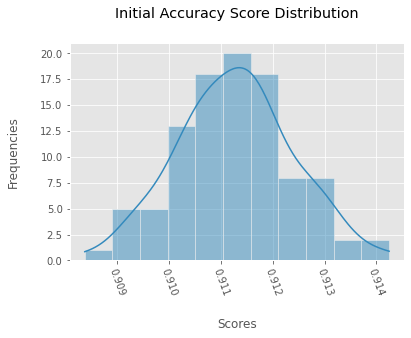

In [21]:
fig = sns.histplot(results, kde=True)
plt.xticks(rotation=-70)
plt.xlabel('Scores', labelpad= 20)
plt.ylabel('Frequencies', labelpad= 20)
plt.title('Initial Accuracy Score Distribution', pad= 25)
plt.show(fig)

Our accuracy seems to be fairly evenly distributed, which is what we want. Our model is consistent in its predictions when presented with new data.

Now we'll look at our confusion matrix to see how our model performed through evaluating the amount of the following:
* True Negative predictions `(0, 0)`
* False Negative predictions `(0, 1)`
* False Positive predictions `(1, 0)`
* True Positive predictions  `(1, 1)`

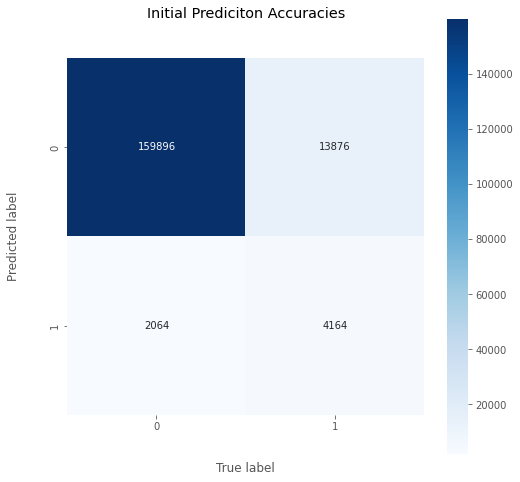

In [22]:
plt.figure(figsize=(8,8))
init_mat = metrics.confusion_matrix(output,model.predict(inputs))
sns.heatmap(init_mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('True label', labelpad= 30)
plt.ylabel('Predicted label', labelpad= 30)
plt.title('Initial Prediciton Accuracies', pad = 40.0);

Something to note about our confusion matrix is that we're predicting a lot of the successful transactions wrong. We have over 3 times more False positives predicting our successful transactions than True negatives. Why might this be?


Lets look at our classification report.

In [23]:
''' (output_dict = True) - output a dictionary to convert 
    into a pandas dataframe for a neater, cleaner table'''

initial_class = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True))
initial_class

,0,1,accuracy,macro avg,weighted avg
precision,0.920628,0.669380,0.911711,0.795004,0.895425
recall,0.986958,0.236819,0.911711,0.611889,0.911711
f1-score,0.952640,0.349861,0.911711,0.651250,0.892174
support,40486.000000,4514.000000,0.911711,45000.000000,45000.000000


Just as we see in our confusion matrix, our classification report shows that our precision in predicting successful transaction `1` is much lower than our precision in predciting unsuccessful transactions `0`. Why is this?

Looking at our data, we have a much higher number of rows denoting unsuccessful transactions. Our data is skewed towards this property, so we need to trim off some of that bias from our dataset. To do this, we'll use the two dataframes we made earlier.

Since we want our unsuccessful transactional data to be balance with our successful transactional data, we need to see how large our datasets are respectively.

In [24]:
print(f"Good Transactions: {good_trans.shape}")
print(f"Bad Transactions: {bad_trans.shape}")

Good Transactions: (18040, 52)
Bad Transactions: (161960, 52)


We want our `bad_trans` to be the same size as our `good_trans`, so we need to trim that dataset accordingly.

In [25]:
bad_trans_trim = bad_trans.iloc[:18040]

# Look at the shape of our new dataframe
bad_trans_trim.shape

(18040, 52)

Now that we have that done, we have balanced targets, we can join those dataframes into one dataframe which we'll use in our model.

In [26]:
# Join dataframes into one
trans_data_balance = pd.concat([good_trans, bad_trans_trim])

# Check that we have balanced target values
values, count = np.unique(trans_data_balance['target'], return_counts=True)

print(f"Values: {values} \nCounts: {count}")

Values: [0 1] 
Counts: [18040 18040]


We now have our new verified balanced dataframe. We'll fit our model again and see how it does this time.

In [27]:
# Create out predictors and targets dataframes
balance_inputs = pd.DataFrame(trans_data_balance[[i for i in trans_data_copy.columns if 'var' in i]])
balance_outputs = pd.DataFrame(trans_data_balance['target'])

# Create our model
model = GaussianNB()

# Initialize empty list to save all accuracy sores
balance_results = []

# Iterate through training the model 100 times as specified by the range
for idx in range(100):

  # create our train/test split
  X_train, X_test, y_train, y_test = model_selection.train_test_split(balance_inputs, np.ravel(balance_outputs), test_size=0.25)

  # fit our model with training subset
  model.fit(X_train,y_train)

  # use testing subset to test our models prediction 
  y_pred = model.predict(X_test)

  # add the accuracy score to list of results
  balance_results.append(metrics.accuracy_score(y_test,y_pred))

print(f"Mean of results: {np.mean(balance_results, dtype = np.float64)}")

Mean of results: 0.7566430155210639


Making sure we have a normal distribution of accuracy scores, we'll create a histogram like earlier.

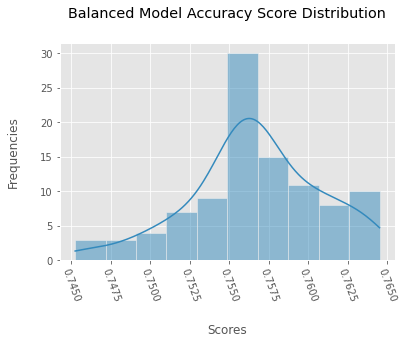

In [28]:
fig = sns.histplot(balance_results, kde=True)
plt.xticks(rotation=-70)
plt.xlabel('Scores', labelpad= 20)
plt.ylabel('Frequencies', labelpad= 20)
plt.title('Balanced Model Accuracy Score Distribution', pad= 25)
plt.show(fig)

Everything is normally distributed. Now we'll look at our confusion matrix to see how our model performed when fit with our balanced data.

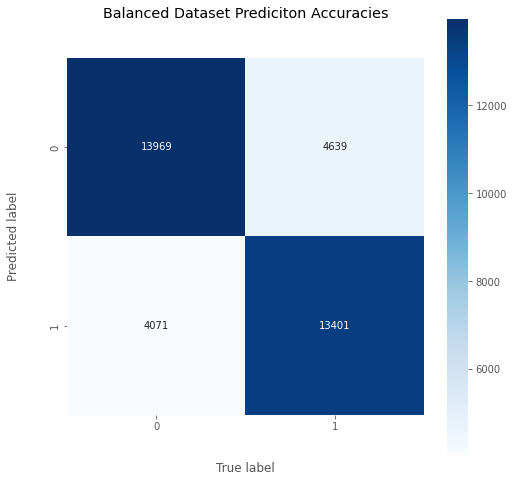

In [29]:
plt.figure(figsize=(8,8))
balance_mat = metrics.confusion_matrix(balance_outputs,model.predict(balance_inputs))
sns.heatmap(balance_mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('True label', labelpad= 30)
plt.ylabel('Predicted label', labelpad= 30)
plt.title('Balanced Dataset Prediciton Accuracies', pad = 40.0);

What we see is that while the accuracy of predicting unsuccessful transactions `0` decreased (denoted by the amount of True Positives), our accuracy of predicting successful transactions has increased (True Negatives).

Now we'll take a look at our classification report to review how well our model did overall.

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(balance_inputs, np.ravel(balance_outputs), test_size=0.25)

# Fit our model with training data
model.fit(X_train, y_train)

# Use testing subset to predict targets
y_pred = model.predict(X_test)

''' (output_dict = True) - output a dictionary to convert 
    into a pandas dataframe for a neater, cleaner table'''

balance_class = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True))
balance_class

,0,1,accuracy,macro avg,weighted avg
precision,0.748924,0.760293,0.754435,0.754609,0.754585
recall,0.768602,0.740147,0.754435,0.754375,0.754435
f1-score,0.758636,0.750085,0.754435,0.754360,0.754378
support,4529.000000,4491.000000,0.754435,9020.000000,9020.000000


## Visualization / Analysis of Results

While our overall accuracy decreased with this new dataset, we notice that the accuracy when predicting successful transactions increased. Lets look at our confusion matrix to further evaluate our predictions per target.

We'll take both matrices and get the percent change of each section within our confusion matrix.

In [31]:
# Initial with Imbalanced Dataset
init_mat

array([[159896,   2064],
       [ 13876,   4164]])

In [32]:
# Post Balancing Dataset
balance_mat

array([[13969,  4071],
       [ 4639, 13401]])

In [33]:

# Find the percentage of change per metric
change = ((balance_mat - init_mat) / init_mat) * 100.0

# Round and then turn all values into strings
change_round = (np.around(change)).astype(str)

# Loop to add '+' and '%' symbols where necessary
for j in range(2):
  for i in range(2):
    if float(change_round[i][j]) > 0:
      change_round[i][j] = '+' + change_round[i][j] + '%'
    else:
      change_round[i][j] = change_round[i][j] + '%'

change_round

array([['-91.0%', '+97.0%'],
       ['-67.0%', '+222.0%']], dtype='<U32')

Now we can plot our confusion matrix and evaluate the changes in predictions from our model using the balanced dataset vice the imbalanced dataset.

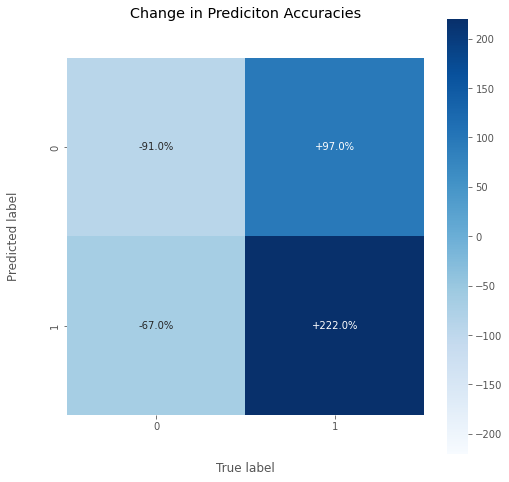

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(change, square=True, annot=change_round, cbar=True, fmt='', cmap="Blues", vmin=-220, vmax=220)
plt.xlabel('True label', labelpad= 30)
plt.ylabel('Predicted label', labelpad= 30)
plt.title('Change in Prediciton Accuracies', pad = 40.0);

With only 11% of the unsuccessfuk transactional data in the revised subset, we've increased our True Positive predictions by 222%.

### Comparing metrics in our classification reports

In [36]:
initial_class

,0,1,accuracy,macro avg,weighted avg
precision,0.920628,0.669380,0.911711,0.795004,0.895425
recall,0.986958,0.236819,0.911711,0.611889,0.911711
f1-score,0.952640,0.349861,0.911711,0.651250,0.892174
support,40486.000000,4514.000000,0.911711,45000.000000,45000.000000


In [37]:
balance_class

,0,1,accuracy,macro avg,weighted avg
precision,0.748924,0.760293,0.754435,0.754609,0.754585
recall,0.768602,0.740147,0.754435,0.754375,0.754435
f1-score,0.758636,0.750085,0.754435,0.754360,0.754378
support,4529.000000,4491.000000,0.754435,9020.000000,9020.000000


In our balanced dataset classification report, we see the following significant changes: 
* We're maintaining approx. 74% precision predicting unsuccessful transactions with approx. 11% of training data.
* We've increased performance in successful transaction predictions (utilizing a smaller dataset)
 * 215% increase in Recall
 * 115% increase in F1-Score

Our model now has the capability of predicting the success of a transaction based on the customers previous transaction data. *With the current balanced dataset, we get an approx 75% accuracy with balanced probabilties for both target variables*

### Model in Action

In [48]:
# Grab random number within range of rows in dataset
idx = np.random.randint(36080)

# Pull data from specified row
newX = np.array(balance_inputs.iloc[idx]).reshape(1, -1)

# Predict target from data pull
print(f"Prediction: {model.predict(newX)[0]}")

# Compare with actual target
print(f"Actual: {balance_outputs.iloc[idx][0]}")

Prediction: 0
Actual: 0
